<a href="https://colab.research.google.com/github/kkettip/sqlite_database_operations/blob/main/sqlite_database_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Analyzing New York Presbyterian (NYP) Hospital Charges

In [2]:
df= pd.read_json('https://raw.githubusercontent.com/hantswilliams/HHA_504_2023/main/WK3/data/nyp/133957095_NewYorkPresbyterianHospital_standardcharges.json')
df

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [3]:
df.shape

(6193, 47)

In [4]:
df.columns

Index(['Code (CPT/DRG)', 'Description', 'Rev Code', 'Inpatient/Outpatient',
       'Gross Charges', 'Discounted Cash Price', 'Aetna', 'Cigna',
       'Empire Blue Cross Blue Shield', 'Emblem Health', 'United Health Group',
       'Aetna Medicare', 'AgeWell Medicare', 'Emblem Medicare',
       'Empire Medicare', 'Fidelis Medicare', 'Healthfirst Medicare',
       'UHC Community Plan/United Medicare', 'VNS Medicare',
       'WellCare Medicare', '1199', 'Affinity Molina Essential',
       'Affinity Molina Medicaid/CHP', 'Amida Care Medicaid',
       'Emblem Medicaid/CHP', 'Empire Healthplus Essential',
       'Empire Healthplus Exchange', 'Empire Healthplus Medicaid/CHP',
       'Fidelis Essential/Exchange', 'Fidelis Medicaid/CHP',
       'Healthfirst Essential/Exchange', 'Healthfirst Medicaid/CHP',
       'MVP Medicaid/CHP', 'MVP Essential', 'United Community Plan Essential',
       'United Community Plan Medicaid', 'VNS Medicaid',
       'Consumer Health Network', 'Devon', 'Equian', 'Fir

Cleaning Column Names

In [5]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [6]:
df.columns

Index(['Code_(CPT/DRG)', 'Description', 'Rev_Code', 'Inpatient/Outpatient',
       'Gross_Charges', 'Discounted_Cash_Price', 'Aetna', 'Cigna',
       'Empire_Blue_Cross_Blue_Shield', 'Emblem_Health', 'United_Health_Group',
       'Aetna_Medicare', 'AgeWell_Medicare', 'Emblem_Medicare',
       'Empire_Medicare', 'Fidelis_Medicare', 'Healthfirst_Medicare',
       'UHC_Community_Plan/United_Medicare', 'VNS_Medicare',
       'WellCare_Medicare', '1199', 'Affinity_Molina_Essential',
       'Affinity_Molina_Medicaid/CHP', 'Amida_Care_Medicaid',
       'Emblem_Medicaid/CHP', 'Empire_Healthplus_Essential',
       'Empire_Healthplus_Exchange', 'Empire_Healthplus_Medicaid/CHP',
       'Fidelis_Essential/Exchange', 'Fidelis_Medicaid/CHP',
       'Healthfirst_Essential/Exchange', 'Healthfirst_Medicaid/CHP',
       'MVP_Medicaid/CHP', 'MVP_Essential', 'United_Community_Plan_Essential',
       'United_Community_Plan_Medicaid', 'VNS_Medicaid',
       'Consumer_Health_Network', 'Devon', 'Equian', 'Fir

# Cleaning Dataset

In [7]:
df.isnull().sum()

Code_(CPT/DRG)                          0
Description                             0
Rev_Code                                0
Inpatient/Outpatient                    0
Gross_Charges                           0
Discounted_Cash_Price                   0
Aetna                                   0
Cigna                                   0
Empire_Blue_Cross_Blue_Shield           0
Emblem_Health                           0
United_Health_Group                     0
Aetna_Medicare                          0
AgeWell_Medicare                        0
Emblem_Medicare                         0
Empire_Medicare                         0
Fidelis_Medicare                        0
Healthfirst_Medicare                    0
UHC_Community_Plan/United_Medicare      0
VNS_Medicare                            0
WellCare_Medicare                       0
1199                                    0
Affinity_Molina_Essential               0
Affinity_Molina_Medicaid/CHP            0
Amida_Care_Medicaid               

In [8]:
duplicateRows = df[df.duplicated()]
duplicateRows

,Code_(CPT/DRG),Description,Rev_Code,Inpatient/Outpatient,Gross_Charges,Discounted_Cash_Price,Aetna,Cigna,Empire_Blue_Cross_Blue_Shield,Emblem_Health,...,Consumer_Health_Network,Devon,Equian,First_Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum_Negotiated_Charge,Maximum_Negotiated_Charge


In [9]:
df.drop_duplicates(inplace=True)
df

,Code_(CPT/DRG),Description,Rev_Code,Inpatient/Outpatient,Gross_Charges,Discounted_Cash_Price,Aetna,Cigna,Empire_Blue_Cross_Blue_Shield,Emblem_Health,...,Consumer_Health_Network,Devon,Equian,First_Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum_Negotiated_Charge,Maximum_Negotiated_Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [10]:
df.shape

(6193, 47)

In [11]:
new_df = df.replace([' '], np.nan)
new_df.dropna(inplace=True)
new_df

,Code_(CPT/DRG),Description,Rev_Code,Inpatient/Outpatient,Gross_Charges,Discounted_Cash_Price,Aetna,Cigna,Empire_Blue_Cross_Blue_Shield,Emblem_Health,...,Consumer_Health_Network,Devon,Equian,First_Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum_Negotiated_Charge,Maximum_Negotiated_Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


Creating csv file for cleaned dataset

In [12]:
new_df.to_csv('clean_NYP_data.csv')

In [13]:
df1 = pd.read_csv('/content/clean_NYP_data.csv')
df1.sample(25)

,Unnamed: 0,Code_(CPT/DRG),Description,Rev_Code,Inpatient/Outpatient,Gross_Charges,Discounted_Cash_Price,Aetna,Cigna,Empire_Blue_Cross_Blue_Shield,...,Consumer_Health_Network,Devon,Equian,First_Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum_Negotiated_Charge,Maximum_Negotiated_Charge
879,879,81440,HC LAB NUC ENCODED MITOCHONDRIAL GENE,0310,Inpatient/Outpatient,2312.000000,2312.000000,2326.8,2799.076,2326.8,...,1050.572800,1050.572800,1050.572800,1050.572800,1050.572800,1050.572800,1050.572800,1050.572800,1050.572800,4155.000000
4817,4817,D9973,HC DENTAL EXTERNAL BLEACHING PER TOOTH,0512,Inpatient/Outpatient,491.000000,491.000000,Not separately payable,Not separately payable,343.7,...,223.110400,223.110400,223.110400,223.110400,223.110400,223.110400,223.110400,223.110400,158.524442,396.311105
3758,3758,23575,HC TX FX SCAPULAR W/MANIP CLOSED,0510,Inpatient/Outpatient,2141.000000,2141.000000,Not separately payable,Not separately payable,1498.7,...,972.870400,972.870400,972.870400,972.870400,972.870400,972.870400,972.870400,972.870400,581.066843,3168.526400
3588,3588,92551,HC SCREENING PURE TONE AIR ONLY,0471,Inpatient/Outpatient,354.000000,354.000000,262.314,202.134,Not separately payable,...,160.857600,160.857600,160.857600,160.857600,160.857600,160.857600,160.857600,160.857600,154.259633,385.649083
485,485,86671,HC LAB FUNGUS ANTIBODY NOT ELSEWHERE SPECIFIED,0302,Inpatient/Outpatient,243.000000,243.000000,8.575,10.199,8.575,...,110.419200,110.419200,110.419200,110.419200,110.419200,110.419200,110.419200,110.419200,8.575000,211.609883
3896,3896,31579,HC FLEX/RIGID TELESCOPIC LARYNGOSCOPY W/STROBO...,0510,Inpatient/Outpatient,2133.000000,2133.000000,Not separately payable,Not separately payable,1493.1,...,969.235200,969.235200,969.235200,969.235200,969.235200,969.235200,969.235200,969.235200,458.518942,1493.100000
5871,6152,916,ALLERGIC REACTIONS WITHOUT MCC,Multiple,Inpatient,37754.792375,37754.792375,22965.3792,26192.946186,23844.6187636364,...,17155.777655,17155.777655,17155.777655,17155.777655,17155.777655,17155.777655,17155.777655,17155.777655,4163.476600,30487.709880
4714,4714,D7946,HC DENTAL LEFORT I (MAXILLA-TOTAL),0512,Inpatient/Outpatient,10669.000000,10669.000000,Not separately payable,Not separately payable,7468.3,...,4847.993600,4847.993600,4847.993600,4847.993600,4847.993600,4847.993600,4847.993600,4847.993600,3310.721456,8535.200000
4919,4919,95700,HC EEG CONT RECORDING W/VID SETUP & TAKEDOWN B...,0740,Inpatient/Outpatient,973.000000,973.000000,720.993,555.583,Not separately payable,...,442.131200,442.131200,442.131200,442.131200,442.131200,442.131200,442.131200,442.131200,178.151750,1450.598800
1152,1152,75731,HC XR ANGIOGRAM ADRENAL UNILATERAL S&I,0323,Inpatient/Outpatient,6923.000000,6923.000000,5129.943,2935.352,1117.9685,...,3145.811200,3145.811200,3145.811200,3145.811200,3145.811200,3145.811200,3145.811200,3145.811200,431.146802,8404.654594


In [14]:
df2 = df1.drop('Unnamed: 0', axis=1)
df2.sample(15)

,Code_(CPT/DRG),Description,Rev_Code,Inpatient/Outpatient,Gross_Charges,Discounted_Cash_Price,Aetna,Cigna,Empire_Blue_Cross_Blue_Shield,Emblem_Health,...,Consumer_Health_Network,Devon,Equian,First_Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum_Negotiated_Charge,Maximum_Negotiated_Charge
5831,855,INFECTIOUS AND PARASITIC DISEASES WITH O.R. PR...,Multiple,Inpatient,104179.301667,104179.301667,52821.7552,60245.353641,72090.5542653333,70123.56878,...,47339.074677,47339.074677,47339.074677,47339.074677,47339.074677,47339.074677,47339.074677,47339.074677,7056.576240,72090.554265
4233,D2740,HC DENTAL CROWN PORCELAIN/CERAMIC,0512,Inpatient/Outpatient,2808.000000,2808.000000,Not separately payable,Not separately payable,1965.6,Not separately payable,...,1275.955200,1275.955200,1275.955200,1275.955200,1275.955200,1275.955200,1275.955200,1275.955200,507.670805,2246.400000
2447,43265,ERCP LITHOTRIPSY CALCULI,0360,Inpatient/Outpatient,33713.000000,33713.000000,9144,7496,13737,9474.4,...,15319.187200,15319.187200,15319.187200,15319.187200,15319.187200,15319.187200,15319.187200,15319.187200,1659.138395,20227.800000
1775,25000,INCISION OF TENDON SHEATH,0360,Inpatient/Outpatient,18622.000000,18622.000000,9144,7496,11924,9474.4,...,8461.836800,8461.836800,8461.836800,8461.836800,8461.836800,8461.836800,8461.836800,8461.836800,1757.287000,11924.000000
3443,78432,HC NM PET MYOCARDIAL PERFUSION W/METABOLIC EVA...,0404,Inpatient/Outpatient,10584.000000,10584.000000,7842.744,4487.616,28491.8161,6251.3661,...,4809.369600,4809.369600,4809.369600,4809.369600,4809.369600,4809.369600,4809.369600,4809.369600,1610.568834,28491.816100
1100,75827,HC X-RAY VENOGRAPHY SUPERIOR VENA CAVA,0320,Inpatient/Outpatient,4998.000000,4998.000000,3703.518,2119.152,790.79,4450.32357,...,2271.091200,2271.091200,2271.091200,2271.091200,2271.091200,2271.091200,2271.091200,2271.091200,395.285122,4450.323570
4177,D1353,HC DENTAL SEALANT REPAIR PER TOOTH,0512,Inpatient/Outpatient,58.000000,58.000000,Not separately payable,Not separately payable,40.6,Not separately payable,...,26.355200,26.355200,26.355200,26.355200,26.355200,26.355200,26.355200,26.355200,26.355200,276.373468
1302,78708,HC NM KIDNEY SCAN MORPHOLOGY 1 STUDY W/FLOW W/...,0341,Inpatient/Outpatient,2958.000000,2958.000000,2191.878,1254.192,1277.1693,1716.1929,...,1344.115200,1344.115200,1344.115200,1344.115200,1344.115200,1344.115200,1344.115200,1344.115200,418.203362,2191.878000
5274,101,SEIZURES WITHOUT MCC,Multiple,Inpatient,54382.057050,54382.057050,31170.264,35550.949995,35618.7258094595,41380.1121,...,24711.206723,24711.206723,24711.206723,24711.206723,24711.206723,24711.206723,24711.206723,24711.206723,4781.039348,41380.112100
4996,G0008,HC ADMIN OF INFLUENZA VACCINE,0771,Inpatient/Outpatient,101.000000,101.000000,74.841,57.671,Not separately payable,81.204,...,45.894400,45.894400,45.894400,45.894400,45.894400,45.894400,45.894400,45.894400,45.894400,219.644455


# Basic statistical analysis

In [15]:
df2.dtypes

Code_(CPT/DRG)                         object
Description                            object
Rev_Code                               object
Inpatient/Outpatient                   object
Gross_Charges                         float64
Discounted_Cash_Price                 float64
Aetna                                  object
Cigna                                  object
Empire_Blue_Cross_Blue_Shield          object
Emblem_Health                          object
United_Health_Group                    object
Aetna_Medicare                         object
AgeWell_Medicare                       object
Emblem_Medicare                        object
Empire_Medicare                        object
Fidelis_Medicare                       object
Healthfirst_Medicare                   object
UHC_Community_Plan/United_Medicare     object
VNS_Medicare                           object
WellCare_Medicare                      object
1199                                   object
Affinity_Molina_Essential         

In [16]:
df2.describe()

,Gross_Charges,Discounted_Cash_Price,Consumer_Health_Network,Devon,Equian,First_Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum_Negotiated_Charge,Maximum_Negotiated_Charge
count,5.912000e+03,5.912000e+03,5.912000e+03,5.912000e+03,5.912000e+03,5.912000e+03,5.912000e+03,5.912000e+03,5.912000e+03,5.912000e+03,5912.000000,5.912000e+03
mean,3.355080e+04,3.355080e+04,1.524549e+04,1.524549e+04,1.524549e+04,1.524549e+04,1.524549e+04,1.524549e+04,1.524549e+04,1.524549e+04,2249.918880,2.390277e+04
std,9.718759e+04,9.718759e+04,4.416204e+04,4.416204e+04,4.416204e+04,4.416204e+04,4.416204e+04,4.416204e+04,4.416204e+04,4.416204e+04,6015.717204,7.136503e+04
min,1.000000e+00,1.000000e+00,4.544000e-01,4.544000e-01,4.544000e-01,4.544000e-01,4.544000e-01,4.544000e-01,4.544000e-01,4.544000e-01,0.454400,1.608000e+00
25%,5.835000e+02,5.835000e+02,2.651424e+02,2.651424e+02,2.651424e+02,2.651424e+02,2.651424e+02,2.651424e+02,2.651424e+02,2.651424e+02,122.228437,6.380010e+02
50%,3.968000e+03,3.968000e+03,1.803059e+03,1.803059e+03,1.803059e+03,1.803059e+03,1.803059e+03,1.803059e+03,1.803059e+03,1.803059e+03,431.142905,4.086731e+03
75%,3.163600e+04,3.163600e+04,1.437540e+04,1.437540e+04,1.437540e+04,1.437540e+04,1.437540e+04,1.437540e+04,1.437540e+04,1.437540e+04,2107.000000,1.925640e+04
max,2.538980e+06,2.538980e+06,1.153712e+06,1.153712e+06,1.153712e+06,1.153712e+06,1.153712e+06,1.153712e+06,1.153712e+06,1.153712e+06,204861.126000,1.713460e+06


Frequency

In [17]:
df2['Description'].value_counts()

KNEE ARTHROSCOPY/SURGERY                                                         16
CYSTOSCOPY AND TREATMENT                                                         12
REPAIR EYELID DEFECT                                                             12
TREAT HUMERUS FRACTURE                                                            9
SHOULDER ARTHROSCOPY/SURGERY                                                      7
                                                                                 ..
PARTIAL REMOVAL LEG BONE(S)                                                       1
REMOVE FEMUR LESION/GRAFT                                                         1
REMOVE FEMUR LESION                                                               1
EXC THIGH/KNEE TUM DEP 5CM/>                                                      1
NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIPAL DIAGNOSIS WITHOUT CC/MCC     1
Name: Description, Length: 5652, dtype: int64

In [18]:
df2['Inpatient/Outpatient'].value_counts()

Inpatient/Outpatient    5189
Inpatient                723
Name: Inpatient/Outpatient, dtype: int64

Central tendency (mean, median, mode)

In [19]:
Mean_Minimum_Negotiated_Charge = df2['Minimum_Negotiated_Charge'].mean()
Median_Minimum_Negotiated_Charge = df2['Minimum_Negotiated_Charge'].median()
Mode_Minimum_Negotiated_Charge = df2['Minimum_Negotiated_Charge'].mode().values[0]
print(f'Mean1: {Mean_Minimum_Negotiated_Charge}')
print(f'Median1: {Median_Minimum_Negotiated_Charge}')
print(f'Mode1: {Mode_Minimum_Negotiated_Charge}')

Mean1: 2249.9188801499627
Median1: 431.1429045953
Mode1: 2412.0


In [20]:
Mean_Maximum_Negotiated_Charge = df2['Maximum_Negotiated_Charge'].mean()
Median_Maximum_Negotiated_Charge = df2['Maximum_Negotiated_Charge'].median()
Mode_Maximum_Negotiated_Charge = df2['Maximum_Negotiated_Charge'].mode().values[0]
print(f'Mean: {Mean_Maximum_Negotiated_Charge}')
print(f'Median: {Median_Maximum_Negotiated_Charge}')
print(f'Mode: {Mode_Maximum_Negotiated_Charge}')

Mean: 23902.77424282837
Median: 4086.7313
Mode: 11924.0


In [21]:
Mean_Gross_Charges = df2['Gross_Charges'].mean()
Median_Gross_Charges = df2['Gross_Charges'].median()
Mode_Gross_Charges = df2['Gross_Charges'].mode().values[0]
print(f'Mean: {Mean_Gross_Charges}')
print(f'Median: {Median_Gross_Charges}')
print(f'Mode: {Mode_Gross_Charges}')

Mean: 33550.80400420582
Median: 3968.0
Mode: 122.0


In [22]:
Mean_Discounted_Cash_Price = df2['Discounted_Cash_Price'].mean()
Median_Discounted_Cash_Price = df2['Discounted_Cash_Price'].median()
Mode_Discounted_Cash_Price = df2['Discounted_Cash_Price'].mode().values[0]
print(f'Mean: {Mean_Discounted_Cash_Price}')
print(f'Median: {Median_Discounted_Cash_Price}')
print(f'Mode: {Mode_Discounted_Cash_Price}')

Mean: 33550.80400420582
Median: 3968.0
Mode: 122.0


Mean, median and mode for Gross_Charges and for Discounted_Cash_Price are the same.

In [23]:
df2.mean()

<ipython-input-23-4a56ca50fe8e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.mean()


Gross_Charges                 33550.804004
Discounted_Cash_Price         33550.804004
Consumer_Health_Network       15245.485340
Devon                         15245.485340
Equian                        15245.485340
First_Health                  15245.485340
Magnacare                     15245.485340
Multiplan/Beechstreet/PHCS    15245.485340
QHM                           15245.485340
Worldwide                     15245.485340
Minimum_Negotiated_Charge      2249.918880
Maximum_Negotiated_Charge     23902.774243
dtype: float64

In [24]:
df2.median()

<ipython-input-24-05e26ec02eba>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.median()


Gross_Charges                 3968.000000
Discounted_Cash_Price         3968.000000
Consumer_Health_Network       1803.059200
Devon                         1803.059200
Equian                        1803.059200
First_Health                  1803.059200
Magnacare                     1803.059200
Multiplan/Beechstreet/PHCS    1803.059200
QHM                           1803.059200
Worldwide                     1803.059200
Minimum_Negotiated_Charge      431.142905
Maximum_Negotiated_Charge     4086.731300
dtype: float64

In [25]:
df2.std()

<ipython-input-25-cefa5b2080f7>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.std()


Gross_Charges                 97187.586273
Discounted_Cash_Price         97187.586273
Consumer_Health_Network       44162.039202
Devon                         44162.039202
Equian                        44162.039202
First_Health                  44162.039202
Magnacare                     44162.039202
Multiplan/Beechstreet/PHCS    44162.039202
QHM                           44162.039202
Worldwide                     44162.039202
Minimum_Negotiated_Charge      6015.717204
Maximum_Negotiated_Charge     71365.028399
dtype: float64

Standard deviation, mean and median for the different insurance types are the same.

Measures of spread (range, variance, standard deviation, IQR)

In [26]:
Max = df2['Discounted_Cash_Price'].max()
Min = df2['Discounted_Cash_Price'].min()
Range_Discounted_Cash_Price = df2['Discounted_Cash_Price'].max() - df2['Discounted_Cash_Price'].min()
Variance_Discounted_Cash_Price = df2['Discounted_Cash_Price'].var()
std_deviation_Discounted_Cash_Price = df2['Discounted_Cash_Price'].std()
iqr_Discounted_Cash_Price = df2['Discounted_Cash_Price'].quantile(0.75) - df2['Discounted_Cash_Price'].quantile(0.25)
print(f'Max: {Max}')
print(f'Min: {Min}')
print(f'Range: {Range_Discounted_Cash_Price}')
print(f'Variance: {Variance_Discounted_Cash_Price}')
print(f'Standard deviation: {std_deviation_Discounted_Cash_Price}')
print(f'IQR: {iqr_Discounted_Cash_Price}')

Max: 2538979.617631959
Min: 1.0
Range: 2538978.617631959
Variance: 9445426925.583761
Standard deviation: 97187.58627306145
IQR: 31052.5


In [27]:
Max = df2['Gross_Charges'].max()
Min = df2['Gross_Charges'].min()
Range_Gross_Charges = df2['Gross_Charges'].max() - df2['Gross_Charges'].min()
Variance_Gross_Charges = df2['Gross_Charges'].var()
std_deviation_Gross_Charges = df2['Gross_Charges'].std()
iqr_Gross_Charges = df2['Gross_Charges'].quantile(0.75) - df2['Gross_Charges'].quantile(0.25)
print(f'Max: {Max}')
print(f'Min: {Min}')
print(f'Range: {Range_Gross_Charges}')
print(f'Variance: {Variance_Gross_Charges}')
print(f'Standard deviation: {std_deviation_Gross_Charges}')
print(f'IQR: {iqr_Gross_Charges}')

Max: 2538979.617631959
Min: 1.0
Range: 2538978.617631959
Variance: 9445426925.583761
Standard deviation: 97187.58627306145
IQR: 31052.5


In [28]:
Max = df2['Maximum_Negotiated_Charge'].max()
Min = df2['Maximum_Negotiated_Charge'].min()
Range_Maximum_Negotiated_Charge = df2['Maximum_Negotiated_Charge'].max() - df2['Maximum_Negotiated_Charge'].min()
Variance_Maximum_Negotiated_Charge = df2['Maximum_Negotiated_Charge'].var()
std_deviation_Maximum_Negotiated_Charge = df2['Maximum_Negotiated_Charge'].std()
iqr_Maximum_Negotiated_Charge = df2['Maximum_Negotiated_Charge'].quantile(0.75) - df2['Maximum_Negotiated_Charge'].quantile(0.25)
print(f'Max: {Max}')
print(f'Min: {Min}')
print(f'Range: {Range_Maximum_Negotiated_Charge}')
print(f'Variance: {Variance_Maximum_Negotiated_Charge}')
print(f'Standard deviation: {std_deviation_Maximum_Negotiated_Charge}')
print(f'IQR: {iqr_Maximum_Negotiated_Charge}')

Max: 1713460.2000000002
Min: 1.608
Range: 1713458.5920000002
Variance: 5092967278.384099
Standard deviation: 71365.02839895812
IQR: 18618.398999999998


In [29]:
Max = df['Minimum_Negotiated_Charge'].max()
Min = df['Minimum_Negotiated_Charge'].min()

Range_Minimum_Negotiated_Charge = df2['Minimum_Negotiated_Charge'].max() - df2['Minimum_Negotiated_Charge'].min()
Variance_Minimum_Negotiated_Charge = df2['Minimum_Negotiated_Charge'].var()
std_deviation_Minimum_Negotiated_Charge = df2['Minimum_Negotiated_Charge'].std()
iqr_Minimum_Negotiated_Charge = df2['Minimum_Negotiated_Charge'].quantile(0.75) - df2['Minimum_Negotiated_Charge'].quantile(0.25)

print(f'Max: {Max}')
print(f'Min: {Min}')

print(f'Range1: {Range_Minimum_Negotiated_Charge}')
print(f'Variance1: {Variance_Minimum_Negotiated_Charge}')
print(f'Standard deviation1: {std_deviation_Minimum_Negotiated_Charge}')
print(f'IQR1: {iqr_Minimum_Negotiated_Charge}')

Max: 204861.126
Min: 0.4544
Range1: 204860.6716
Variance1: 36188853.47582183
Standard deviation1: 6015.717203777272
IQR1: 1984.7715625


# Visualizing Distribution

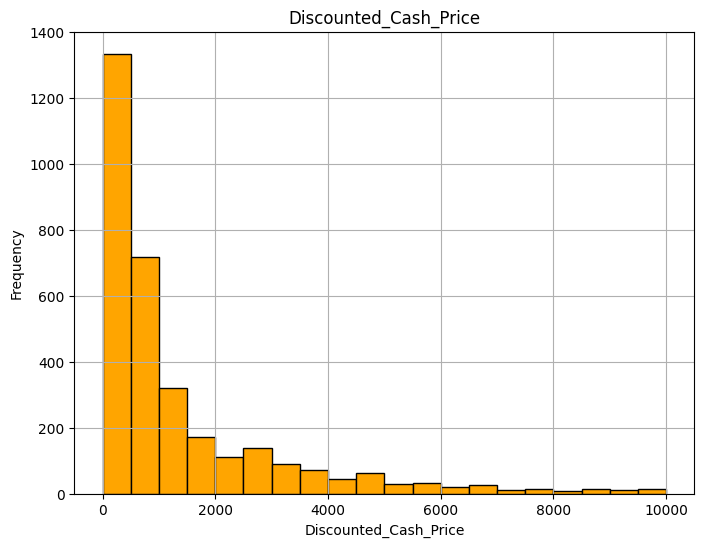

In [30]:
#Discounted_Cash_Price

plt.figure(figsize=(8, 6))
plt.hist(df2['Discounted_Cash_Price'], bins=20, color='orange', edgecolor='black', range=[0, 10000])
plt.title('Discounted_Cash_Price')
plt.xlabel('Discounted_Cash_Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

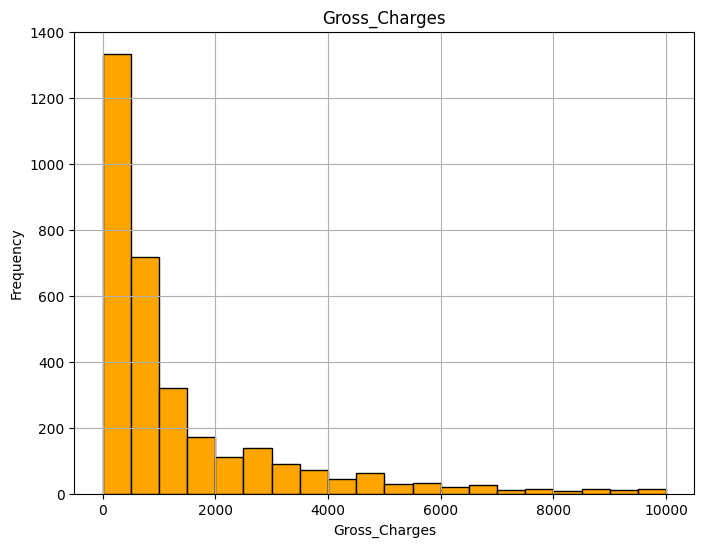

In [31]:
#Gross_Charges

plt.figure(figsize=(8, 6))
plt.hist(df2['Gross_Charges'], bins=20, color='orange', edgecolor='black', range=[0, 10000])
plt.title('Gross_Charges')
plt.xlabel('Gross_Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

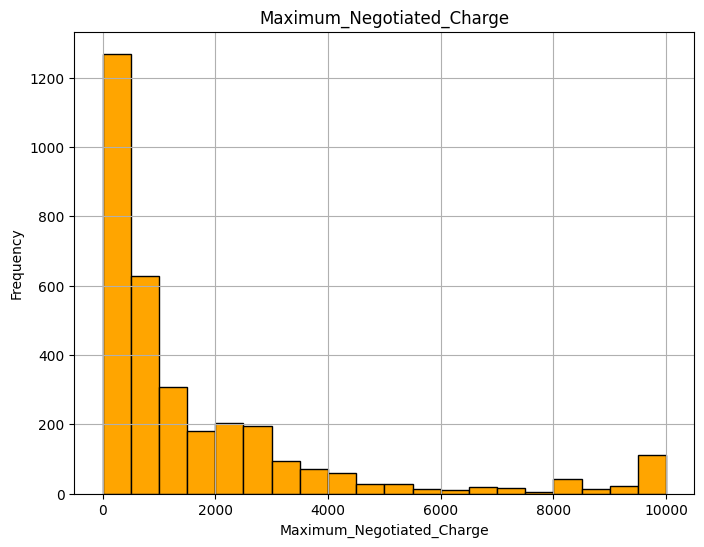

In [32]:
#Maximum_Negotiated_Charge

plt.figure(figsize=(8, 6))
plt.hist(df2['Maximum_Negotiated_Charge'], bins=20, color='orange', edgecolor='black', range=[0, 10000])
plt.title('Maximum_Negotiated_Charge')
plt.xlabel('Maximum_Negotiated_Charge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

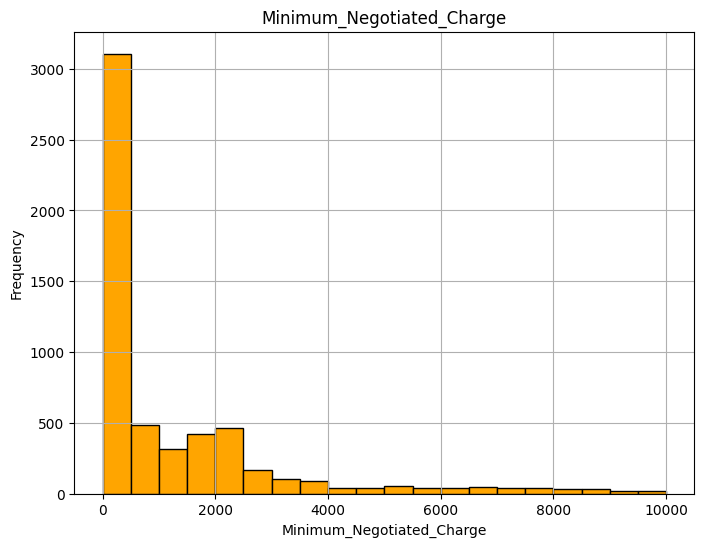

In [33]:
#Minimum_Negotiated_Charge

plt.figure(figsize=(8, 6))
plt.hist(df['Minimum_Negotiated_Charge'], bins=20, color='orange', edgecolor='black', range=[0, 10000])
plt.title('Minimum_Negotiated_Charge')
plt.xlabel('Minimum_Negotiated_Charge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The minimum and maximum negotiated charge have the highest frequency  the minumum and maximum charge at 0 to 500. Similar distribution is seen with discounted cash price and gross charges.

# Analysis Maimondies Medical Center (MMC) charge amount.

In [34]:
df = pd.read_csv('/content/MMC_CDM.csv')

In [35]:
#CDM: Charge Description Master
df.sample(15)

,CDM,CDM_Description,ChargeAmount
8614,18905018,"INSERT SGL TV ELECTRODE,PM/ICD",33514.0
29578,AS067441,STENT COVERED ICAST 5X22MMX80C,4513.0
67080,G4061534,SHEATH INTRODUCER T-PEEL ON-Q,99.0
16807,50195869,EMG THOR PARASPINAL(EXCT1/T12),590.0
15651,40396361,"IV INFUS,HYDRAT,EA ADD HR",185.0
74933,G4092982,SCREW MULTI AXIAL 3.5X12MM VER,1230.0
91371,G4137515,INSERT NO 5. TRIATHLON TS PL,4183.0
87004,G4129364,SCREW CREO 5.5 POLYAXIAL COC,1323.0
76175,G4098535,CATH COYOTE 2X60MMX150CM,580.0
3558,13301004,OPSITE,4.0


In [36]:
df.shape

(107972, 3)

In [37]:
df.columns

Index(['CDM', 'CDM_Description', 'ChargeAmount'], dtype='object')

In [38]:
df.dtypes

CDM                 object
CDM_Description     object
ChargeAmount       float64
dtype: object

In [39]:
df.isnull().sum()
#no null values

CDM                0
CDM_Description    0
ChargeAmount       0
dtype: int64

In [40]:
duplicateRows = df[df.duplicated()]
duplicateRows
#no duplicate rows

,CDM,CDM_Description,ChargeAmount


# Basic statistical analysis

Central tendency (mean, median, mode)

In [41]:
#Charge Amount
Mean_ChargeAmount = df['ChargeAmount'].mean()
Median_ChargeAmount = df['ChargeAmount'].median()
Mode_ChargeAmount = df['ChargeAmount'].mode().values[0]
print(f'Mean1: {Mean_ChargeAmount}')
print(f'Median1: {Median_ChargeAmount}')
print(f'Mode1: {Mode_ChargeAmount}')

Mean1: 2028.6159360760194
Median1: 659.0
Mode1: 1665.0


Measures of spread (range, variance, standard deviation, IQR)

In [42]:
#Charge Amount
Max = df['ChargeAmount'].max()
Min = df['ChargeAmount'].min()

Range_ChargeAmount = df['ChargeAmount'].max() - df['ChargeAmount'].min()
Variance_ChargeAmount = df['ChargeAmount'].var()
std_deviation_ChargeAmount = df['ChargeAmount'].std()
iqr_ChargeAmount = df['ChargeAmount'].quantile(0.75) - df['ChargeAmount'].quantile(0.25)
#iqr: interquartile range


print(f'Max: {Max}')
print(f'Min: {Min}')

print(f'Range: {Range_ChargeAmount}')
print(f'Variance: {Variance_ChargeAmount}')
print(f'Standard deviation: {std_deviation_ChargeAmount}')
print(f'IQR: {iqr_ChargeAmount}')

Max: 184862.0
Min: 0.01
Range: 184861.99
Variance: 20524023.615758438
Standard deviation: 4530.344756832358
IQR: 2043.25


In [43]:
df.describe()

,ChargeAmount
count,107972.000000
mean,2028.615936
std,4530.344757
min,0.010000
25%,170.750000
50%,659.000000
75%,2214.000000
max,184862.000000


Frequency

In [44]:
df['CDM_Description'].value_counts()

IMP BREAST NATRELLE INSPIRA       335
NAIL LONG NAIL KIT R1/5 TI R      230
NAIL LONG NAIL KIT R1/5 TI L      230
SCREW HEADLESS COMPRESSION S      174
INSERT TRIATHLON PS X3 TIB 5      172
                                 ... 
REFSTAR C5 MHS HYPER MALE-MALE      1
PM SET                              1
PM PREP SET                         1
DEFIBRILLATOR ELECTRODE PADS        1
Td toxoids preserv free>7yr,IM      1
Name: CDM_Description, Length: 41242, dtype: int64

In [45]:
df['CDM'].value_counts()

*RMBD_AdvCardK2    1
G4083585           1
G4084395           1
G4084389           1
G4084054           1
                  ..
AS113406           1
AS113405           1
AS113404           1
AS113403           1
VFC90714           1
Name: CDM, Length: 107972, dtype: int64

Visualizing Distribution

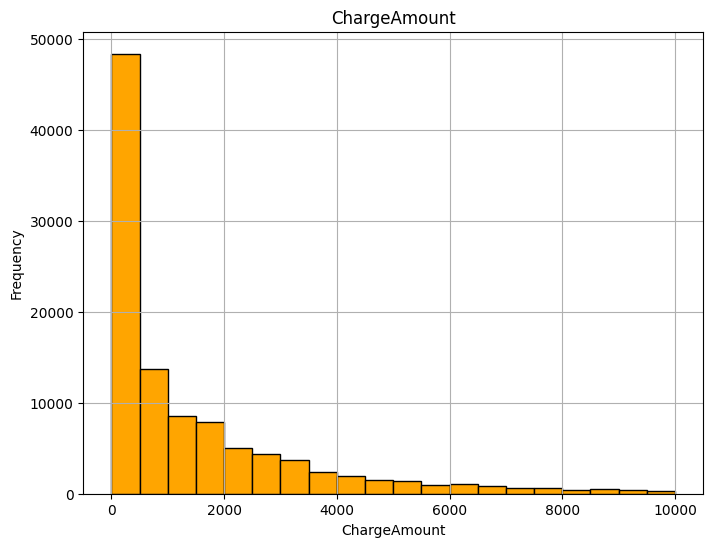

In [46]:
#Charge Amount
plt.figure(figsize=(8, 6))
plt.hist(df['ChargeAmount'], bins=20, color='orange', edgecolor='black', range=[0, 10000])
plt.title('ChargeAmount')
plt.xlabel('ChargeAmount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The highest frequency charge amount is approximately 0 to 500.

# Creating a local SQLite database

####Manual table creation

Import required libraries.

In [47]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3

Create and connect to the database health.db.

In [48]:
conn = sqlite3.connect('health.db')
c = conn.cursor()

Create a table and columns for the table.

In [49]:
c.execute("""
            CREATE TABLE treatment_costs
                (
                    hospital_name text,
                    insurance_type text,
                    code text,
                    inpatient_or_outpatient text,
                    department text,
                    treatment_description text,
                    payment_method text,
                    total_cost_negotiated real,
                    total_cost_minimum real,
                    total_cost_maximum real
                );
          """)

conn.commit()

Confirm that the table was created in the database.

In [50]:
c.execute('''
  SELECT name
  FROM sqlite_master
  WHERE type='table';
  ''')

c.fetchall()

#for value in c.fetchall():
#    print(value)

[('treatment_costs',)]

In [51]:
c.execute('''
  SELECT * FROM treatment_costs;
''')

print(c.fetchall())

[]


Once confirmed, insert data into the table.

In [52]:
sql_query = """

INSERT INTO treatment_costs (
  'hospital_name',
  'insurance_type',
  'code',
  'inpatient_or_outpatient',
  'department',
  'treatment_description',
  'payment_method',
  'total_cost_negotiated',
  'total_cost_minimum',
  'total_cost_maximum'
  )
  values (
    'southampton hospital',
    'aetna',
    '100',
    'outpatient',
    'walkin clinic',
    'cough',
    'cash',
    100.00,
    1.00,
    5000.00
  );

"""

print(sql_query)



INSERT INTO treatment_costs (
  'hospital_name',
  'insurance_type',
  'code',
  'inpatient_or_outpatient',
  'department',
  'treatment_description',
  'payment_method',
  'total_cost_negotiated',
  'total_cost_minimum',
  'total_cost_maximum'
  )
  values (
    'southampton hospital',
    'aetna',
    '100',
    'outpatient',
    'walkin clinic',
    'cough',
    'cash',
    100.00,
    1.00,
    5000.00
  );




Commiting to database.

In [53]:
c.execute(sql_query)
conn.commit()

Check that the data was inserted.

In [54]:
sql_query_2 = """

select *
from treatment_costs;

"""

c.execute(sql_query_2)
print(c.fetchall())

[('southampton hospital', 'aetna', '100', 'outpatient', 'walkin clinic', 'cough', 'cash', 100.0, 1.0, 5000.0)]


Adding additional rows to database.

In [55]:
c.execute('''
    INSERT INTO treatment_costs
    VALUES
        ('NYP hospital',
        'other',
        '10',
        'outpatient',
        'Dermatology',
        'rash',
        'credit card',
        500.00,
        1.00,
        5000.00),
        ('MMC hospital',
        'other',
        '102',
        'outpatient',
        'Optometry',
        'eye exam',
        'credit card',
        450.00,
        1.00,
        5000.00)
      ''')

Commiting to database

In [56]:
conn.commit()

Check that new data rows were added.

In [57]:
sql_query_2 = """

select *
from treatment_costs;

"""

c.execute(sql_query_2)
print(c.fetchall())

[('southampton hospital', 'aetna', '100', 'outpatient', 'walkin clinic', 'cough', 'cash', 100.0, 1.0, 5000.0), ('NYP hospital', 'other', '10', 'outpatient', 'Dermatology', 'rash', 'credit card', 500.0, 1.0, 5000.0), ('MMC hospital', 'other', '102', 'outpatient', 'Optometry', 'eye exam', 'credit card', 450.0, 1.0, 5000.0)]


Automatic table creation

Create and connect to database.

In [58]:
engine = create_engine('sqlite:///health.db')

In [59]:
pd.read_sql_query("select * from treatment_costs;", conn)

,hospital_name,insurance_type,code,inpatient_or_outpatient,department,treatment_description,payment_method,total_cost_negotiated,total_cost_minimum,total_cost_maximum
0,southampton hospital,aetna,100,outpatient,walkin clinic,cough,cash,100.0,1.0,5000.0
1,NYP hospital,other,10,outpatient,Dermatology,rash,credit card,500.0,1.0,5000.0
2,MMC hospital,other,102,outpatient,Optometry,eye exam,credit card,450.0,1.0,5000.0


# Adding Maimonides Medical Center dataset for charges into database

Loading dataset

In [60]:
df = pd.read_csv('/content/MMC_CDM.csv')
df.sample(15)

,CDM,CDM_Description,ChargeAmount
39370,AS126120,SCREW BONE CANNC LCKNG TIMAX,160.0
98841,G4144985,COMP LT X-SML DIST RADIAL CO,10717.0
17920,AS004048,SHELL ACETABULAR OSTEOLOCK 54M,1394.0
71033,G4077589,NAIL EX FEMORAL CANN LATERA,2964.0
57546,G4016794,SUTURE GUT CHROMIC BLUE 6-0 17,46.0
101518,NR056701,TUBE CONNECTING DISPO PLASTIC,10.0
93420,G4139564,NAIL FLEXIBLE NAIL PRE-CVD 3,498.0
84247,G4122544,SZR BREAST INSPIRA SRX 580ML,400.0
14334,40199416,PROLONGED E&M EA ADD 30,300.0
80586,G4111166,SCREW CC NCB F-THRD 4.5X40MM,157.0


Replacing column name ChargeAmount with Charge_Amount

In [61]:
df.rename(columns={'ChargeAmount':'Charge_Amount'
            }, inplace=True)

In [62]:
df.columns

Index(['CDM', 'CDM_Description', 'Charge_Amount'], dtype='object')

Adding dataset to database and naming table as MMC.

In [63]:
df.to_sql('MMC', conn, if_exists='replace')

107972

Check that new dataset was added as table MMC.

In [64]:
query = """
  select *
  from MMC
  where Charge_Amount = 45;
"""

response = pd.read_sql(query, conn)
response

,index,CDM,CDM_Description,Charge_Amount
0,44,10100338,VORICONAZOLE 40MG/ML SUSP/ ML,45.0
1,1622,10136010,ANUSOL HC 25MG SUPP,45.0
2,2132,12000320,TROPONIN,45.0
3,2223,12000437,"KETONE BODIES,QUANT",45.0
4,2262,12000476,"DRUG TST,PRESMP,OBSV ONLY/DOS",45.0
...,...,...,...,...
264,106500,RA092767,SHEATH BRITE TIP 9FRX23CM,45.0
265,106501,RA092768,SHEATH BRITE TIP 10FRX23CM,45.0
266,106509,RA092896,INTRODUCER MICRO ACCESS TEARAW,45.0
267,106593,RA094328,SHEATH BRITE TIP 11FRX23CM,45.0


Closing connection to database.

In [65]:
conn.close()